In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from scipy import stats
from matplotlib.colors import ListedColormap

In [2]:
DATASET_DIR = r"../data/"
DATASET_NAME = "theta_posix_with_apps_no_negative_outliers_no_time_witherrors_with_Model_D_results.csv"
DATASET_PATH = Path(DATASET_DIR, DATASET_NAME).with_suffix(".csv")

In [3]:
df_theta_posix = pd.read_csv(DATASET_PATH)

In [4]:
df_blue_waters_posix = pd.read_csv(Path(r"../data/blue_waters_posix_with_paths_no_negative_outliers_no_time_witherrors.csv"))

In [5]:
len(df_theta_posix)

218111

In [6]:
len(df_blue_waters_posix)

820701

**inputs for nwchem are mostly 0!**

In [7]:
df_theta_posix[df_theta_posix.exe == "nwchem"].loc[:, (df_theta_posix[df_theta_posix.exe == "nwchem"] == 0).all()]

,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,POSIX_RENAME_TARGETS,POSIX_MODE,POSIX_BYTES_READ,POSIX_BYTES_WRITTEN,...,WRITE_0_100,WRITE_100_1K,WRITE_1K_10K,WRITE_10K_100K,WRITE_100K_1M,WRITE_1M_4M,WRITE_4M_10M,WRITE_10M_100M,WRITE_100M_1G,WRITE_1G_PLUS
3330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36590,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36591,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36592,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36593,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
218049,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
most_used_apps = df_theta_posix.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False)

In [9]:
len(most_used_apps)

342

In [10]:
most_used_apps["cp2k.psmp"]

8626

In [11]:
most_used_apps_blue_waters = df_blue_waters_posix.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False)

In [12]:
len(most_used_apps_blue_waters)

906

## Plot the ok predictions (i.e. correct order of magnitude)

In [13]:
ok_predictions = df_theta_posix[np.abs(np.log(df_theta_posix.POSIX_TOTAL_TIME) -
                np.log(df_theta_posix.POSIX_TOTAL_TIME_predicted))
               < 2]
ok_predictions_counts = ok_predictions.groupby(by=["exe"]).count()["nprocs"].sort_values(ascending=False)
#If you want percentages
#(ok_predictions_counts / most_used_apps[most_used_apps.index.isin(ok_predictions_counts.index)]) * 100
ok_predictions_counts

C:\Users\arcturus5340\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


exe
pw.x                         44040
gmx_mpi                      11765
qb                            7053
predict.x-2.0.3-ThetaCray     4510
e3sm.exe                      4304
                             ...  
mpi-io-test                      1
mpibcp                           1
nekbone                          1
rxmd-040808                      1
intx_on_sphere_test              1
Name: nprocs, Length: 172, dtype: int64

In [14]:
def plot_ok_predictions(app_name, filename=None):
    filterspec = (df_theta_posix.exe.str.contains(app_name))#
    filterspec_goodpred = (df_theta_posix.index.isin(ok_predictions.index) == True)
    ax = df_theta_posix[filterspec].plot.scatter(x="POSIX_TOTAL_TIME",y="POSIX_TOTAL_TIME",label="expected output",c="navy")
    df_theta_posix[filterspec & (filterspec_goodpred == False)].plot.scatter(x="POSIX_TOTAL_TIME",y="POSIX_TOTAL_TIME_predicted",ax=ax, c="orange",label="predictions")#, c=kernel,cmap="viridis", colorbar=True)
    df_theta_posix[filterspec & (filterspec_goodpred == True)].plot.scatter(x="POSIX_TOTAL_TIME",y="POSIX_TOTAL_TIME_predicted",ax=ax, c="limegreen",label="correct order of magnitude")
    ax.set_yscale("log")
    ax.set_xscale("log")
    if filename:
        plt.savefig(filename, format="png", bbox_inches="tight", dpi=300)

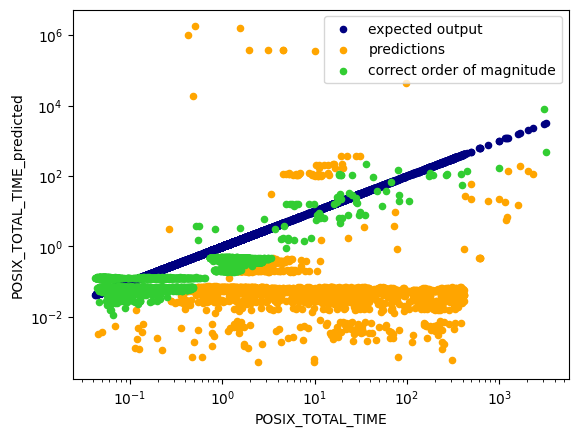

In [15]:
plot_ok_predictions("pw.x", "../results/interpretability/Model_D_pw.x.png")

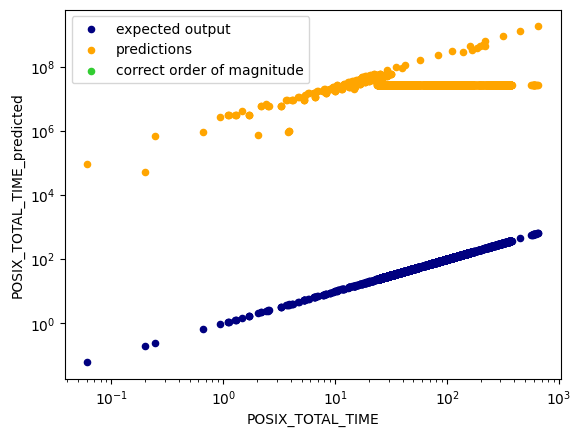

In [16]:
plot_ok_predictions("cp2k.psmp", "../results/interpretability/Model_D_cp2k.psmp.png")

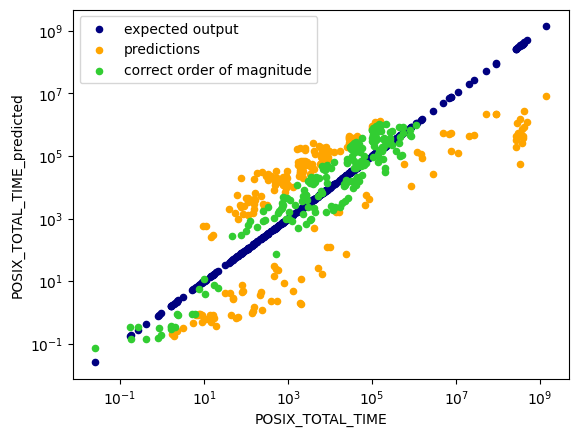

In [17]:
plot_ok_predictions("rxmd")

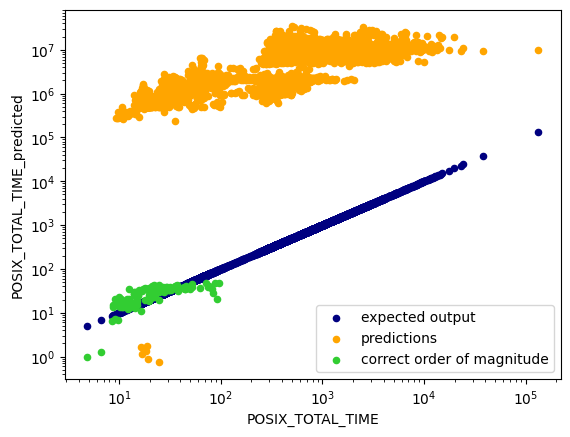

In [18]:
plot_ok_predictions("vasp_std")

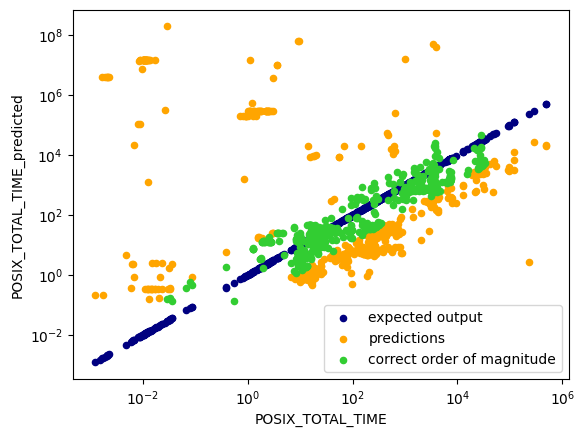

In [19]:
plot_ok_predictions("nek5000")

## Comparison of app occurences between Theta and Blue Waters

In [20]:
app_counts = pd.DataFrame(most_used_apps.rename("count")).join(pd.DataFrame(most_used_apps_blue_waters.rename("count")),how='outer',lsuffix='_theta',rsuffix='_blue_waters')
app_counts["ok_predictions"] = ok_predictions_counts
app_counts[app_counts.index.str.contains("cp2k")]

,count_theta,count_blue_waters,ok_predictions
exe,,,
cp2k.psmp,8626.0,NaN,NaN
cp2k_2.5.1.popt,NaN,148.0,NaN


## Create overview of prediction quality per app

In [21]:
abs_errors = (df_theta_posix.POSIX_TOTAL_TIME - df_theta_posix.POSIX_TOTAL_TIME_predicted).abs()
abs_errors_percent = abs_errors / df_theta_posix["mean"]
df_app_overview = pd.DataFrame()
df_app_overview["error_percent"] = abs_errors_percent
#df_app_overview["dup_mean"] = df_theta_posix["mean"]
df_app_overview["exe"] = df_theta_posix.exe
df_app_overview["POSIX_TOTAL_TIME"] = df_theta_posix.POSIX_TOTAL_TIME
df_app_overview["POSIX_TOTAL_TIME_predicted"] = df_theta_posix.POSIX_TOTAL_TIME_predicted
df_app_overview_agg = df_app_overview.groupby("exe").agg({
    "exe":"count",
    "error_percent":["median","count"],
    "POSIX_TOTAL_TIME":["mean","var"],
    "POSIX_TOTAL_TIME_predicted":["mean","var"]
}).sort_values(by=[("exe","count"),("error_percent","median")],ascending=False)
df_app_overview_agg[df_app_overview_agg.index.str.contains("")]

exe  error_percent        POSIX_TOTAL_TIME  \
                                count         median  count             mean   
exe                                                                            
nwchem                          78209   85830.779765  75021         0.006045   
pw.x                            46972       0.499271  46640         4.004956   
gmx_mpi                         12812       2.081607  12783         1.770848   
vasp_std                         9186            NaN      0       653.653275   
cp2k.psmp                        8626  869410.374105   1221        60.489736   
...                               ...            ...    ...              ...   
pjoinwrfout                         1            NaN      0         2.319298   
train.x-2.0.3-gfortran_mkl_mpi      1            NaN      0         0.227379   
wc110_8                             1            NaN      0        52.979760   
wfreq.x                             1            NaN      0         0.094000   
xmfdn-h2-lobpcg                     1            NaN      0         3.876629   

                                             POSIX_TOTAL_TIME_predicted  \
                                         var                       mean   
exe                                                                       
nwchem                          8.812174e-03               5.591577e+03   
pw.x                            1.463861e+03               1.366967e+02   
gmx_mpi                         2.668767e+03               1.464482e+00   
vasp_std                        3.709776e+06               4.920723e+06   
cp2k.psmp                       4.540923e+03               2.854970e+07   
...                                      ...                        ...   
pjoinwrfout                              NaN               7.169109e+03   
train.x-2.0.3-gfortran_mkl_mpi           NaN               8.653145e-01   
wc110_8                                  NaN               2.464465e+02   
wfreq.x                                  NaN               7.376459e+05   
xmfdn-h2-lobpcg                          NaN               6.448653e+04   

                                              
                                         var  
exe                                           
nwchem                          1.138806e+08  
pw.x                            1.627750e+08  
gmx_mpi                         2.192612e+01  
vasp_std                        2.280803e+13  
cp2k.psmp                       8.446377e+14  
...                                      ...  
pjoinwrfout                              NaN  
train.x-2.0.3-gfortran_mkl_mpi           NaN  
wc110_8                                  NaN  
wfreq.x                                  NaN  
xmfdn-h2-lobpcg                          NaN  

[342 rows x 7 columns]

In [22]:
abs_errors = (df_theta_posix.POSIX_TOTAL_TIME - df_theta_posix.POSIX_TOTAL_TIME_predicted).abs()
abs_errors_percent = abs_errors / df_theta_posix["mean"]
df_mae_by_app = pd.DataFrame()
df_mae_by_app["error_percent"] = abs_errors_percent
df_mae_by_app["dup_mean"] = df_theta_posix["mean"]
df_mae_by_app["exe"] = df_theta_posix.exe
df_mae_by_app["POSIX_TOTAL_TIME"] = df_theta_posix.POSIX_TOTAL_TIME
df_mae_by_app["POSIX_TOTAL_TIME_predicted"] = df_theta_posix.POSIX_TOTAL_TIME_predicted
df_mae_by_app_agg = df_mae_by_app.groupby(["exe","dup_mean"]).agg({
    "exe":"count",
    "error_percent":["median","count"],
    "POSIX_TOTAL_TIME":["mean","var"],
    "POSIX_TOTAL_TIME_predicted":["mean","var"]
}).sort_index(level=["dup_mean"],ascending=False)

### IQR Criterion for Behaviour Similarity

In [23]:
pwx_df = df_theta_posix.loc[:,["exe","mean","POSIX_TOTAL_TIME"]]
iqr_counts = pwx_df.groupby(["exe","mean"]).agg(lambda x: x[x > x.quantile(0.75) + (1.5 * x.quantile(0.75) - x.quantile(0.25))].count())

In [24]:
iqr_counts.groupby(["exe"]).sum().sort_values(by=["POSIX_TOTAL_TIME"],ascending=False)

,POSIX_TOTAL_TIME
exe,
nwchem,4562
pw.x,1898
gmx_mpi,203
xmfdn-menj-lan,55
bs-solctra-multinode,14
...,...
c12cx.gr.x_41,0
c12cx.gr.x_42,0
c12cx.gr.x_43,0


## Cross-Correlation Criterion

In [25]:
quantile_distances = df_theta_posix.loc[:,["exe","mean","POSIX_TOTAL_TIME","POSIX_TOTAL_TIME_predicted"]].groupby(["exe","mean"]).agg({
    "mean":"count",
    "POSIX_TOTAL_TIME":lambda x: x.quantile(0.75) - x.median(),
    "POSIX_TOTAL_TIME_predicted":lambda x: x.median() - x.quantile(0.25)
})

In [26]:
pwx_dists = quantile_distances[quantile_distances.index.get_level_values("exe").str.contains("pw.x")]
pwx_dists[pwx_dists["mean"] > 100].corr()

,mean,POSIX_TOTAL_TIME,POSIX_TOTAL_TIME_predicted
mean,1.000000,-0.122367,-0.303355
POSIX_TOTAL_TIME,-0.122367,1.000000,0.490359
POSIX_TOTAL_TIME_predicted,-0.303355,0.490359,1.000000


## Investigate the reasons for outliers

In [27]:
df_theta_posix[df_theta_posix["mean"] == 22.203737326696807].sort_values("error")

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
5167,5167,5167,194,172,0,34,1499,6,54,0,...,0,0,-1,0.045962,16,1,pw.x,22.203737,-22.157776,0.126979
14049,14049,14049,194,172,0,34,1499,6,54,0,...,0,0,-1,0.046316,16,1,pw.x,22.203737,-22.157422,0.126898
5875,5875,5875,194,172,0,34,1499,6,54,0,...,0,0,0,0.048052,16,1,pw.x,22.203737,-22.155685,0.066687
913,913,913,194,172,0,34,1499,6,54,0,...,0,0,-1,0.048101,16,1,pw.x,22.203737,-22.155637,0.126854
20575,20575,20575,194,172,0,34,1499,6,54,0,...,0,0,-1,0.049335,16,1,pw.x,22.203737,-22.154402,0.127011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,483,483,194,172,0,34,1499,6,54,0,...,0,0,8,300.330125,16,1,pw.x,22.203737,278.126388,0.029052
7386,7386,7386,194,172,0,34,1499,6,54,0,...,0,0,8,313.198139,16,1,pw.x,22.203737,290.994402,0.026644
5944,5944,5944,194,172,0,34,1499,6,54,0,...,0,0,9,318.107847,16,1,pw.x,22.203737,295.904110,0.038332
3599,3599,3599,194,172,0,34,1499,6,54,0,...,0,0,1,320.199082,16,1,pw.x,22.203737,297.995345,0.023321


## Hexbin plots and Boxplots of prediction results

In [28]:
def get_darker_cmap(cmap):
    my_cmap = cmap(np.arange(cmap.N))
    my_cmap[:,0:3] *= 0.9
    my_cmap = ListedColormap(my_cmap)
    return my_cmap

In [29]:
def plot_app_errors(pwx_sets,pwx_sets_median,gridsize1=(50,30),gridsize2=(50,4)):
    plot_data = pd.DataFrame({"error_percent":pwx_sets["error_percent"],"dup_mean":pwx_sets["dup_mean"]})
    hb_nonagg = plt.hexbin(x=plot_data["dup_mean"],y=plot_data["error_percent"] * 100,bins="log",gridsize=gridsize1,cmap=get_darker_cmap(plt.cm.Greys))
    #plt.colorbar(hb_nonagg)
    plot_data_median = pd.DataFrame({"error_percent":pwx_sets_median[("error_percent","median")].values,"dup_mean":pwx_sets_median.index.get_level_values("dup_mean")})
    hb = plt.hexbin(x=plot_data_median["dup_mean"],y=plot_data_median["error_percent"] * 100,bins="log",gridsize=gridsize2)#,cmap="Reds")
    plt.colorbar(hb, label="density")
    plt.xlabel("duplicate set mean")
    plt.ylabel("prediction error (%)")

In [30]:
def plot_boxplot(df_large_sets,app_name,mean_selection_ids,time_column,showfliers=True,showmeans=False):
    fig, ax = plt.subplots(figsize=(14,6))
    pwx_boxplot_obj = {}
    for i,index in enumerate(mean_selection_ids):
        curr_mean = df_large_sets.iloc[index]["dup_mean"][0]
        pwx_boxplot_obj[curr_mean] = df_mae_by_app[df_mae_by_app["exe"].str.contains(app_name) & (df_mae_by_app["dup_mean"] == curr_mean)][time_column]
    ax.boxplot(pwx_boxplot_obj.values(),vert=False,showfliers=showfliers,showmeans=showmeans,meanprops={'markerfacecolor': 'red', 'markeredgecolor': 'red'})
    ax.set_yticklabels(list(map(lambda mean: round(mean,3),pwx_boxplot_obj.keys())))
    ax.set_xlabel(time_column)
    ax.set_ylabel("duplicate set mean")

### pw.x (QuantumEspresso)

In [31]:
pd.DataFrame(df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("pw.x")])

exe error_percent       POSIX_TOTAL_TIME                \
                count        median count             mean           var   
exe  dup_mean                                                              
pw.x 192.597838     3      1.462349     3       192.597838  2.781043e+04   
     168.521659     2      0.999960     2       168.521659  5.676471e+04   
     147.598353     2      0.999702     2       147.598353  2.714974e+04   
     146.915060     2      0.999975     2       146.915060  4.314047e+04   
     111.744094     3      0.000691     3       111.744094  3.741195e+04   
...               ...           ...   ...              ...           ...   
     0.051032       2      0.184113     2         0.051032  1.349474e-07   
     0.050852       2      1.495571     2         0.050852  3.277823e-07   
     0.049646       2      1.555769     2         0.049646  9.949420e-08   
     0.048308       2      1.627049     2         0.048308  8.932158e-07   
     0.048064       2      1.638190     2         0.048064  1.366372e-05   

                POSIX_TOTAL_TIME_predicted                
                                      mean           var  
exe  dup_mean                                             
pw.x 192.597838                   0.057873  4.529917e-03  
     168.521659                   0.085728  3.908593e-03  
     147.598353                   0.043981  4.441353e-04  
     146.915060                   0.083850  3.746916e-03  
     111.744094                   0.048079  5.002136e-03  
...                                    ...           ...  
     0.051032                     0.060428  1.176830e-06  
     0.050852                     0.126906  1.767200e-08  
     0.049646                     0.126885  5.073266e-09  
     0.048308                     0.126908  8.873784e-09  
     0.048064                     0.126803  4.500000e-14  

[352 rows x 7 columns]

#### Create overview of pw.x (QuantumEspresso) jobs that have unusually high variance

In [32]:
pwx_high_variance = pd.DataFrame(df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("pw.x") & (df_mae_by_app_agg[("POSIX_TOTAL_TIME","var")] > 16000)]).reset_index()
pwx_high_variance

exe    dup_mean   exe error_percent       POSIX_TOTAL_TIME                \
                    count        median count             mean           var   
0  pw.x  192.597838     3      1.462349     3       192.597838  27810.426803   
1  pw.x  168.521659     2      0.999960     2       168.521659  56764.714091   
2  pw.x  147.598353     2      0.999702     2       147.598353  27149.743984   
3  pw.x  146.915060     2      0.999975     2       146.915060  43140.473281   
4  pw.x  111.744094     3      0.000691     3       111.744094  37411.951097   
5  pw.x  108.440930     3      0.003170     3       108.440930  35123.034735   
6  pw.x   79.824099     4      0.012442     4        79.824099  25031.594645   
7  pw.x   48.248280     9      0.001626     9        48.248280  16069.237637   

  POSIX_TOTAL_TIME_predicted            
                        mean       var  
0                   0.057873  0.004530  
1                   0.085728  0.003909  
2                   0.043981  0.000444  
3                   0.083850  0.003747  
4                   0.048079  0.005002  
5                   0.083279  0.001423  
6                   0.071542  0.001470  
7                   0.078333  0.002602

In [33]:
df_high_variance = df_theta_posix[df_theta_posix["mean"].isin(pwx_high_variance["dup_mean"])]
df_high_variance = df_high_variance.drop(["Unnamed: 0","index"],axis=1)
df_high_variance
#df_high_variance.to_csv("/home/av639747/Dokumente/masterarbeit/pwx_variance_above_16000.csv",index=False)

,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,POSIX_FSYNCS,POSIX_RENAME_SOURCES,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
350,194,172,0,34,1501,6,54,0,0,0,...,0,0,9,317.141504,16,1,pw.x,79.824099,237.317405,0.039848
644,194,172,0,34,1505,6,54,0,0,0,...,0,0,2,295.884733,16,1,pw.x,192.597838,103.286895,-0.007720
1864,194,172,0,34,1494,6,54,0,0,0,...,0,0,-1,0.054393,16,1,pw.x,48.248280,-48.193887,0.126957
3560,194,172,0,34,1494,6,54,0,0,0,...,0,0,6,385.171483,16,1,pw.x,48.248280,336.923203,0.006707
3577,194,172,0,34,1494,6,54,0,0,0,...,0,0,-1,0.051889,16,1,pw.x,48.248280,-48.196391,0.127083
3905,194,172,0,34,1501,6,54,0,0,0,...,0,0,0,1.883014,16,1,pw.x,79.824099,-77.941085,0.063932
4534,194,172,0,34,1501,6,54,0,0,0,...,0,0,-1,0.046967,16,1,pw.x,146.915060,-146.868093,0.127133
4551,194,172,0,34,1499,6,54,0,0,0,...,0,0,1,264.109606,16,1,pw.x,147.598353,116.511253,0.029079
4951,194,172,0,34,1505,6,54,0,0,0,...,0,0,-1,0.208912,16,1,pw.x,192.597838,-192.388926,0.126768
5962,194,172,0,34,1494,6,54,0,0,0,...,0,0,6,1.355889,16,1,pw.x,48.248280,-46.892391,0.005057


#### Plot duplicate set errors

Text(0, 0.5, 'prediction error (%)')

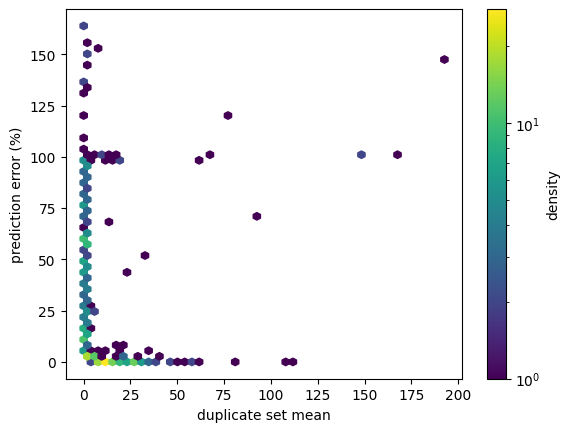

In [34]:
pwx_sets = df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("pw.x")]
plot_data = pd.DataFrame({"error_percent":pwx_sets[("error_percent","median")].values,"dup_mean":pwx_sets.index.get_level_values("dup_mean")})
hb = plt.hexbin(x=plot_data["dup_mean"],y=plot_data["error_percent"] * 100,bins="log",gridsize=(50,30))
plt.colorbar(hb,label="density")
plt.xlabel("duplicate set mean")
plt.ylabel("prediction error (%)")

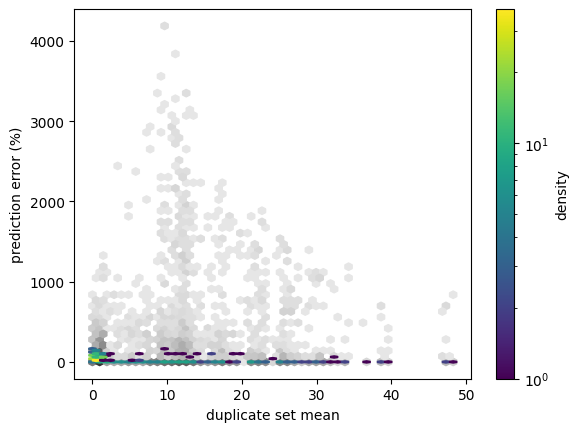

In [35]:
pwx_sets = df_mae_by_app[df_mae_by_app["exe"].str.contains("pw.x") & (df_mae_by_app["error_percent"] < 100) & (df_mae_by_app["dup_mean"] <= 50)]
pwx_sets_median = df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("pw.x")  & (df_mae_by_app_agg.index.get_level_values("dup_mean") <= 50)]
plot_app_errors(pwx_sets,pwx_sets_median)

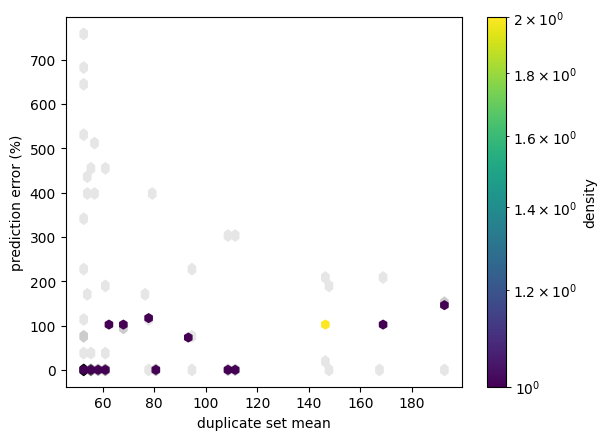

In [36]:
pwx_sets = df_mae_by_app[df_mae_by_app["exe"].str.contains("pw.x") & (df_mae_by_app["error_percent"] < 100) & (df_mae_by_app["dup_mean"] > 50)]
pwx_sets_median = df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("pw.x")  & (df_mae_by_app_agg.index.get_level_values("dup_mean") > 50)]
plot_app_errors(pwx_sets,pwx_sets_median,(50,20),(50,5))

#### Boxplots

Boxplots per duplicate set only make sense if the duplicate sets are large enough

In [37]:
df_large_sets_pwx = pd.DataFrame(df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("pw.x") & (df_mae_by_app_agg[("exe","count")] > 100)]).reset_index()
df_large_sets_pwx

exe   dup_mean    exe error_percent        POSIX_TOTAL_TIME               \
                     count        median  count             mean          var   
0   pw.x  26.482347    120      0.002924    120        26.482347  4761.161008   
1   pw.x  25.387623    148      0.003131    148        25.387623  5953.991745   
2   pw.x  22.826111    151      0.003523    151        22.826111  4995.048145   
3   pw.x  22.249491    108      0.003605    108        22.249491  4610.994797   
4   pw.x  22.203737    102      0.003643    102        22.203737  6030.023506   
5   pw.x  17.865087    117      0.004497    117        17.865087  3219.348149   
6   pw.x  17.162653    163      0.004357    163        17.162653  3551.059705   
7   pw.x  13.134005    279      0.005801    279        13.134005  2587.803666   
8   pw.x  12.712165    134      0.005946    134        12.712165  1816.498572   
9   pw.x  12.570089    363      0.006010    363        12.570089  2312.365264   
10  pw.x  12.544182    244      0.006150    244        12.544182  1744.306530   
11  pw.x  12.299134    233      0.006077    233        12.299134  2190.071721   
12  pw.x  12.143692    124      0.006283    124        12.143692  2421.732040   
13  pw.x  12.071466    366      0.006352    366        12.071466  1989.545819   
14  pw.x  11.615713    153      0.006732    153        11.615713  2672.427334   
15  pw.x  11.403251    285      0.006750    285        11.403251  1915.841483   
16  pw.x  11.242140    146      0.006791    146        11.242140  1705.544602   
17  pw.x  10.794726    215      0.006948    215        10.794726  1991.936950   
18  pw.x  10.452372    164      0.007301    164        10.452372  2574.411249   
19  pw.x  10.413978    112      0.007076    112        10.413978  1348.661569   
20  pw.x   9.830752    123      0.007805    123         9.830752  1854.837313   
21  pw.x   9.423698    244      0.008212    244         9.423698  1412.518020   
22  pw.x   9.158112    208      0.008412    208         9.158112  1294.675376   
23  pw.x   7.757916    108      0.009804    108         7.757916   848.336480   
24  pw.x   1.358942    111      0.573129    111         1.358942     0.274678   
25  pw.x   1.350846   4828      0.343193   4828         1.350846   237.440115   
26  pw.x   1.343590   1040      0.594503   1040         1.343590     0.236601   
27  pw.x   1.221651   1963      0.627310   1963         1.221651     0.041323   
28  pw.x   1.210457   2469      0.386597   2469         1.210457   150.500792   
29  pw.x   1.194406   2776      0.587639   2776         1.194406     0.102294   
30  pw.x   1.191031  20276      0.586632  20276         1.191031     0.098550   
31  pw.x   1.148488    388      0.588089    388         1.148488     0.068266   
32  pw.x   1.125637    250      0.553519    250         1.125637     0.159213   
33  pw.x   1.105295    368      0.585467    368         1.105295     0.029371   
34  pw.x   0.981301   1518      0.465293   1518         0.981301     0.262881   
35  pw.x   0.976313    653      0.494423    653         0.976313     0.048154   
36  pw.x   0.970097    487      0.483091    487         0.970097     0.071098   
37  pw.x   0.966100    176      0.464478    176         0.966100     0.054746   
38  pw.x   0.935574    527      0.490840    527         0.935574     0.015482   
39  pw.x   0.931801    132      0.460588    132         0.931801     0.017815   
40  pw.x   0.929601    109      0.479509    109         0.929601     0.018257   

   POSIX_TOTAL_TIME_predicted            
                         mean       var  
0                    0.072101  0.001790  
1                    0.073567  0.001771  
2                    0.077876  0.001711  
3                    0.072219  0.001429  
4                    0.076690  0.001275  
5                    0.073984  0.001640  
6                    0.081735  0.001447  
7                    0.078756  0.001512  
8                    0.075889  0.001941  
9                    0.081881  0.001546  
10               

In [38]:
mean_selection_ids_pwx = [0,9,21,30,38]

C:\Users\arcturus5340\AppData\Local\Temp\ipykernel_296\2839887796.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr_mean = df_large_sets.iloc[index]["dup_mean"][0]


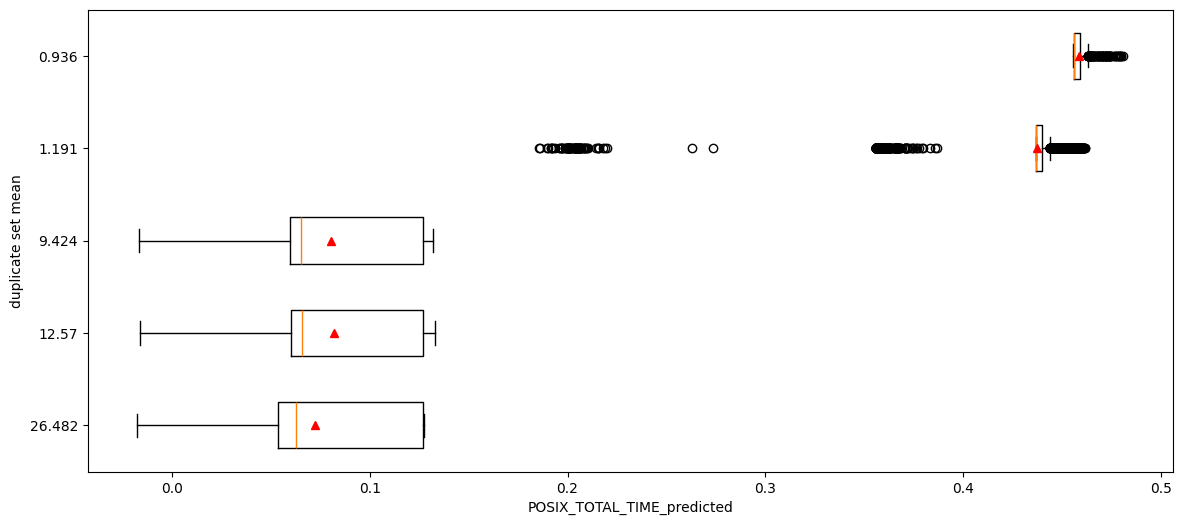

In [39]:
plot_boxplot(df_large_sets_pwx,"pw.x",mean_selection_ids_pwx,"POSIX_TOTAL_TIME_predicted",True,True)

C:\Users\arcturus5340\AppData\Local\Temp\ipykernel_296\2839887796.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr_mean = df_large_sets.iloc[index]["dup_mean"][0]


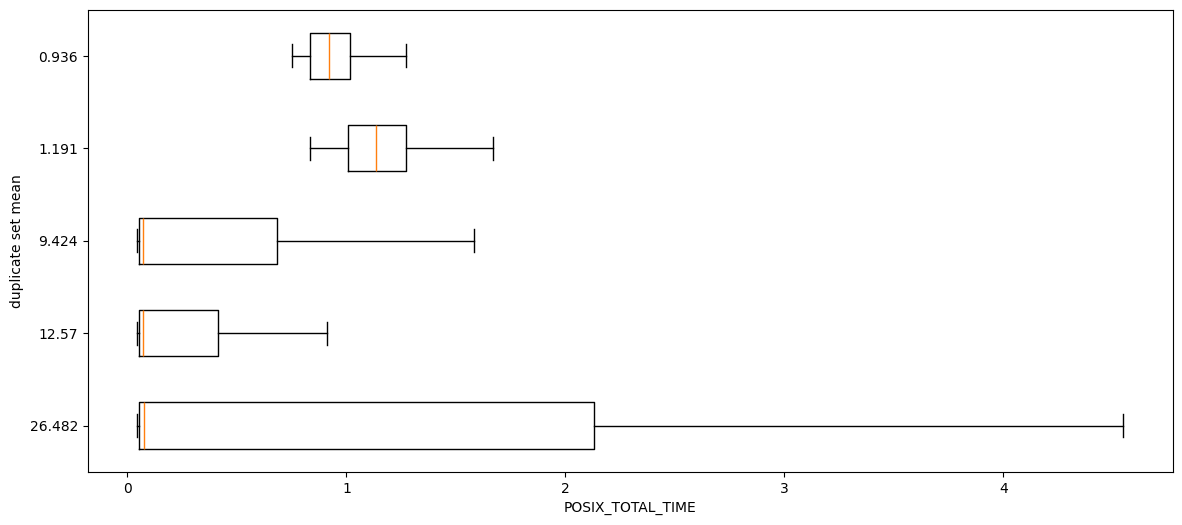

In [40]:
plot_boxplot(df_large_sets_pwx,"pw.x",mean_selection_ids_pwx,"POSIX_TOTAL_TIME",False)

C:\Users\arcturus5340\AppData\Local\Temp\ipykernel_296\2839887796.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  curr_mean = df_large_sets.iloc[index]["dup_mean"][0]


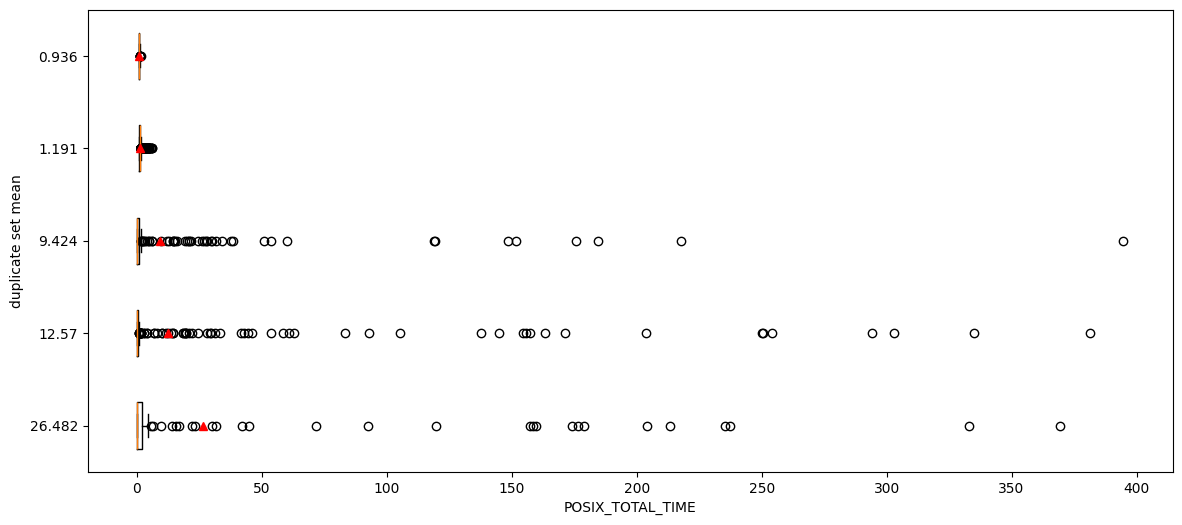

In [41]:
plot_boxplot(df_large_sets_pwx,"pw.x",mean_selection_ids_pwx,"POSIX_TOTAL_TIME",True,True)

### cp2k

In [42]:
df_large_sets_cp2k = pd.DataFrame(df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("cp2k")]).reset_index()
df_large_sets_cp2k

exe    dup_mean   exe error_percent       POSIX_TOTAL_TIME  \
                           count        median count             mean   
0    cp2k.psmp  605.776131     6  4.580180e+04     6       605.776131   
1    cp2k.psmp  596.476535     3  4.651590e+04     3       596.476535   
2    cp2k.psmp  346.175999     2  7.946526e+04     2       346.175999   
3    cp2k.psmp  110.549699     2  2.488397e+05     2       110.549699   
4    cp2k.psmp  106.249756     2  2.589104e+05     2       106.249756   
..         ...         ...   ...           ...   ...              ...   
219  cp2k.psmp   24.596219     2  1.118441e+06     2        24.596219   
220  cp2k.psmp   24.556673     2  1.119796e+06     2        24.556673   
221  cp2k.psmp   24.490823     2  1.123254e+06     2        24.490823   
222  cp2k.psmp   24.417506     2  1.126629e+06     2        24.417506   
223  cp2k.psmp   24.399033     2  1.127480e+06     2        24.399033   

                POSIX_TOTAL_TIME_predicted               
            var                       mean          var  
0    258.778355               2.774625e+07   571.200000  
1     61.572390               2.774622e+07   665.333333  
2      0.368457               2.750931e+07  1922.000000  
3     56.849153               2.750927e+07  2048.000000  
4     27.558671               2.750927e+07   242.000000  
..          ...                        ...          ...  
219    0.008061               2.750944e+07  1058.000000  
220    0.323675               2.749850e+07     0.000000  
221    0.051726               2.750943e+07  1352.000000  
222    0.000511               2.750948e+07   392.000000  
223    0.032711               2.750945e+07   288.000000  

[224 rows x 9 columns]

In [43]:
df_theta_posix[df_theta_posix["mean"] == df_large_sets_cp2k.iloc[27]["dup_mean"][0]]

C:\Users\arcturus5340\AppData\Local\Temp\ipykernel_296\1285322944.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_theta_posix[df_theta_posix["mean"] == df_large_sets_cp2k.iloc[27]["dup_mean"][0]]


,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
4,4,4,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,34.010366,64,1,cp2k.psmp,33.63173,0.378636,27746254.0
38,38,38,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,32.735842,64,1,cp2k.psmp,33.63173,-0.895888,27746262.0
89,89,89,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,32.893440,64,1,cp2k.psmp,33.63173,-0.738289,27746270.0
125,125,125,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,36.938808,64,1,cp2k.psmp,33.63173,3.307079,27746234.0
184,184,184,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,33.702320,64,1,cp2k.psmp,33.63173,0.070590,27746266.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20322,20322,20322,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,32.397479,64,1,cp2k.psmp,33.63173,-1.234251,27746264.0
20327,20327,20327,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,32.801286,64,1,cp2k.psmp,33.63173,-0.830444,27746250.0
20508,20508,20508,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,35.522537,64,1,cp2k.psmp,33.63173,1.890807,27746246.0
20520,20520,20520,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,34.549826,64,1,cp2k.psmp,33.63173,0.918096,27746220.0


In [44]:
df_theta_posix[df_theta_posix["mean"] == df_large_sets_cp2k.iloc[0]["dup_mean"][0]]

C:\Users\arcturus5340\AppData\Local\Temp\ipykernel_296\3972795550.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df_theta_posix[df_theta_posix["mean"] == df_large_sets_cp2k.iloc[0]["dup_mean"][0]]


,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
5581,5581,5581,7891771,7861736,0,3,424660,60035,90055,0,...,0,0,0,635.799299,64,1,cp2k.psmp,605.776131,30.023168,27746276.0
6336,6336,6336,7891771,7861736,0,3,424660,60035,90055,0,...,0,0,0,606.518376,64,1,cp2k.psmp,605.776131,0.742245,27746276.0
8383,8383,8383,7891771,7861736,0,3,424660,60035,90055,0,...,0,0,0,590.952763,64,1,cp2k.psmp,605.776131,-14.823368,27746244.0
9238,9238,9238,7891771,7861736,0,3,424660,60035,90055,0,...,0,0,0,596.446682,64,1,cp2k.psmp,605.776131,-9.329449,27746220.0
11866,11866,11866,7891771,7861736,0,3,424660,60035,90055,0,...,0,0,0,596.843281,64,1,cp2k.psmp,605.776131,-8.932850,27746226.0
13592,13592,13592,7891771,7861736,0,3,424660,60035,90055,0,...,0,0,0,608.096385,64,1,cp2k.psmp,605.776131,2.320254,27746246.0


In [45]:
df_theta_posix[(df_theta_posix.exe.str.contains("cp2k")) & (df_theta_posix.POSIX_FILENOS > 5e8)]

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
210627,210627,210627,516196627,516196609,0,1434,30990,30394,8273,0,...,0,0,-1,651.141837,8192,1,cp2k.psmp,NaN,0.0,1.823010e+09


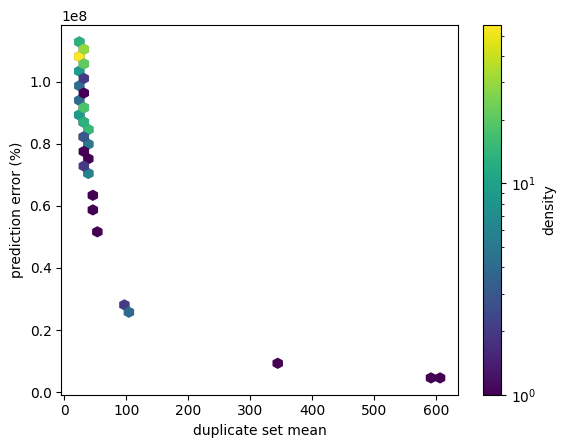

In [46]:
pwx_sets = df_mae_by_app[df_mae_by_app["exe"].str.contains("cp2k")]# & (df_mae_by_app["dup_mean"] <= 1000)]
pwx_sets_median = df_mae_by_app_agg[df_mae_by_app_agg.index.get_level_values("exe").str.contains("cp2k")]#  & (df_mae_by_app_agg.index.get_level_values("dup_mean") <= 1000)]
plot_app_errors(pwx_sets,pwx_sets_median,40,40)

## Softplus experiments

<Axes: ylabel='Density'>

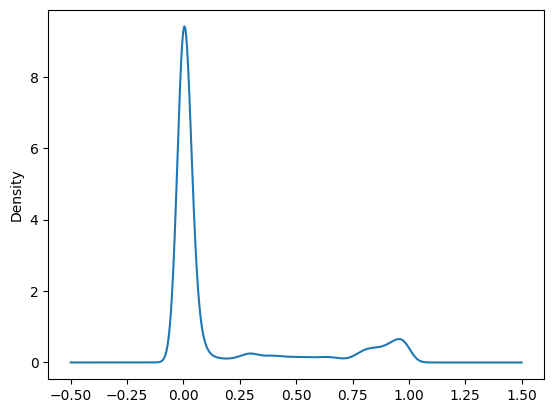

In [47]:
df_theta_posix[df_theta_posix.POSIX_TOTAL_TIME < 1].POSIX_TOTAL_TIME.plot.kde()

In [48]:
df_theta_posix[df_theta_posix.POSIX_TOTAL_TIME < 0.25e-1]

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
213,213,213,11,10,0,8,2,2,13,0,...,0,0,-1,0.011388,2,1,sw4lite,0.011151,0.000237,0.050787
219,219,219,1,1,0,0,1,0,0,0,...,0,0,-1,0.000861,1,0,miniFE_theta_online_perf_low_cap.x,0.000965,-0.000104,0.048478
226,226,226,1,1,0,0,1,0,0,0,...,0,0,-1,0.001482,1,0,miniFE_theta_online_perf_iter_papi_freq.x,0.000948,0.000534,0.048478
232,232,232,10,10,0,0,10,0,2,0,...,0,0,0,0.002393,4,0,bs-solctra-multinode,NaN,0.000000,0.019105
240,240,240,1,1,0,0,1,0,0,0,...,0,0,-1,0.000781,1,0,miniFE_theta_online_perf_low_cap.x,0.000903,-0.000122,0.048478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218038,218038,218038,1005,1005,0,0,0,0,9,-5,...,0,0,0,0.002957,32,1,nwchem,0.003087,-0.000130,1.076799
218049,218049,218049,2943,2943,0,0,0,0,8,-4,...,0,0,0,0.003288,128,1,nwchem,0.003325,-0.000037,1112.909700
218080,218080,218080,0,-4,-4,0,0,0,5,0,...,0,0,-1,0.001277,1,1,gmx_mpi,0.002336,-0.001059,0.077334
218091,218091,218091,2931,2931,0,0,0,0,8,-4,...,0,0,0,0.003178,128,1,nwchem,0.003321,-0.000143,1029.563000


In [49]:
df_theta_posix[(df_theta_posix.exe == "nwchem") == False]

,Unnamed: 0,index,POSIX_OPENS,POSIX_FILENOS,POSIX_DUPS,POSIX_READS,POSIX_WRITES,POSIX_SEEKS,POSIX_STATS,POSIX_MMAPS,...,WRITE_100M_1G,WRITE_1G_PLUS,rank,POSIX_TOTAL_TIME,nprocs,lustre,exe,mean,error,POSIX_TOTAL_TIME_predicted
0,0,0,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,29.684507,64,1,cp2k.psmp,31.913841,-2.229334,2.774622e+07
1,1,1,194,172,0,34,1499,6,54,0,...,0,0,0,28.155456,16,1,pw.x,11.403251,16.752206,6.343156e-02
2,2,2,46037,40869,0,4713059,1719073,1271774,5429,0,...,0,0,-1,71229.030892,128,1,train.x-2.0.3-ifort_intelmpi,NaN,0.000000,1.318478e+02
3,3,3,194,172,0,34,1492,6,54,0,...,0,0,2,1.707640,16,1,pw.x,6.519022,-4.811382,-4.562914e-03
4,4,4,7891771,7861736,0,3,424661,60035,90055,0,...,0,0,0,34.010366,64,1,cp2k.psmp,33.631730,0.378636,2.774625e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218106,218106,218106,618,0,0,15040,10450,21,1555,0,...,0,0,-1,6.904750,64,1,vasp_ncl,NaN,0.000000,6.391590e-01
218107,218107,218107,68,-22,-22,7829,0,0,116,0,...,0,0,-1,1.194060,16,1,pw.x,1.221651,-0.027592,4.371117e-01
218108,218108,218108,34713,34116,0,8745,49849,240,504,-335,...,0,0,-1,220.660687,96,1,qmcpack,NaN,0.000000,8.556621e-01
218109,218109,218109,68,-22,-22,7829,0,0,116,0,...,0,0,-1,1.274516,16,1,pw.x,1.221651,0.052865,4.369141e-01


In [50]:
neg_threshold = df_theta_posix[df_theta_posix.POSIX_TOTAL_TIME_predicted < 0].POSIX_TOTAL_TIME.median()
filterspec = (df_theta_posix.POSIX_TOTAL_TIME < neg_threshold) & (df_theta_posix.POSIX_TOTAL_TIME_predicted < 0)
df_theta_posix_no_zeros = df_theta_posix[filterspec == False]